In [47]:
import time
import numpy as np
import tkinter as tk
from PIL import ImageTk, Image
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [48]:
np.random.seed(1)

In [76]:
class Env(tk.Tk):
    def __init__(self,img, goal_state):
        
        super(Env, self).__init__()
        self.shape = img.shape###############################
        self.action_space = ['u', 'd', 'l', 'r']
        self.action_size = len(self.action_space)
        self.title('DeepQNetwork')
        self.counter = 0
        self.build_image(img,goal_state)
        

    def build_image(self,img,goal_state):
        
        self.rewards = list()
        self.goal = list()
        
        self.set_rewards(img,goal_state)
    
    
    def set_rewards(self,img,goal_state):
        
        nS = np.prod(self.shape)
        nA = self.action_size

        MAX_Y = self.shape[0]
        MAX_X = self.shape[1]

        P = {}
        Q = np.zeros((nS, nA), dtype = float)
        
        grid = np.arange(nS).reshape(self.shape)
#         print("grid = ",grid)
        it = np.nditer(grid, flags=['multi_index'])

        while not it.finished:
            s = it.iterindex
            y, x = it.multi_index
#             print("y, x = ",y, x)

            P[s] = {self.action_space[a] : [] for a in range(nA)}
#             print("P[s] = ",P[s])
            is_done = lambda s: s == (final_state) # give final state here
            if is_done(s):
                reward = 100.0 

            # We're stuck in a terminal state
            if is_done(s):
                P[s][self.action_space[0]] = [( s, reward, True)]
                P[s][self.action_space[3]] = [( s, reward, True)]
                P[s][self.action_space[1]] = [( s, reward, True)]
                P[s][self.action_space[2]] = [( s, reward, True)]
            # Not a terminal state
            else:
                ns_up = s if y == 0 else s - MAX_X
                reward_up = self.find_reward(img,s, ns_up,MAX_Y,MAX_X,final_state)
                
                ns_right = s if x == (MAX_X - 1) else s + 1
                reward_right = self.find_reward(img,s, ns_right,MAX_Y,MAX_X,final_state)
                
                ns_down = s if y == (MAX_Y - 1) else s + MAX_X
                reward_down = self.find_reward(img,s, ns_down,MAX_Y,MAX_X,final_state)
                
                ns_left = s if x == 0 else s - 1
                reward_left = self.find_reward(img,s, ns_left,MAX_Y,MAX_X,final_state)
                
                P[s][self.action_space[0]] = [( ns_up, reward_up, is_done(ns_up))]
                P[s][self.action_space[3]] = [( ns_right, reward_right, is_done(ns_right))]
                P[s][self.action_space[1]] = [( ns_down, reward_down, is_done(ns_down))]
                P[s][self.action_space[2]] = [( ns_left, reward_left, is_done(ns_left))]

            it.iternext()
        
        
        
        
        
        

img.shape =  (64, 64)


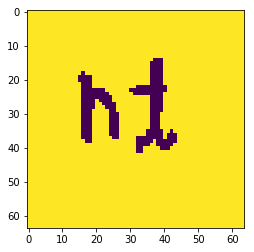

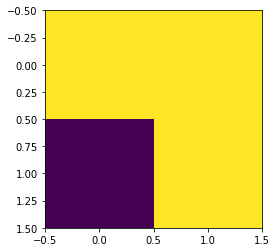

In [77]:
import cv2
img = cv2.imread("input_img_2_char.png",0)
print("img.shape = ",img.shape)
plt.imshow(img)
plt.show()
plt.imshow(img[24:26,24:26])#img[13:45,13:45]
plt.show()
IMG = img[24:26,24:26]
env = Env(IMG, 3,[IMG.shape[0],IMG.shape[1]])
# print("env.shape,env.action_space,env.action_size, env.title",env.shape,env.action_space,env.action_size, env.title)
env.set_rewards(IMG ,env.final_state)

In [78]:
# env.P, env.Q